# <font color='#31394d'>Linear Regression Practice Exercises</font>


For this exercise, we'll be using the carseats dataset that is provided as a csv file in the `data` folder.

We will attempt to predict child car seat sales (the `Sales` variable) based on a number of predictors using data from 400 different locations. The dataset includes qualitative predictors such as `Shelveloc`, an indicator of the quality of the shelving location; that is, the space within each store in which the car seat is displayed. The predictor `Shelveloc` takes on three possible values: Bad, Medium, and Good. `US` and `Urban` are also categorical (binary) features.

🚀 <font color='#d9c4b1'> Exercise: </font> Import and examine the data. Don't forget to import the necessary packages!

In [34]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [35]:
carseats1 = pd.read_csv(r'C:\Users\HP\Desktop\KIDOLA\DATA SCIENCE\homework\homework\data\carseats.csv')
X = carseats1.iloc[:, :0].values
y = carseats1.iloc[:, 4].values
print(carseats1)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [36]:
pd.options.display.max_info_rows = 500
display(carseats1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [37]:
carseats1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Now let's do some basic exploratory data analysis.

🚀 <font color='#d9c4b1'> Exercise: </font> Determine which columns are numerical and examine their distributions. Look for outliers. Can you see any strong relationships, particularly with the `Sales` outcome?

In [38]:
# your code goes here
import matplotlib.pyplot as plt
carseats1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_11332\1489860838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(carseats1.corr())


<AxesSubplot: >

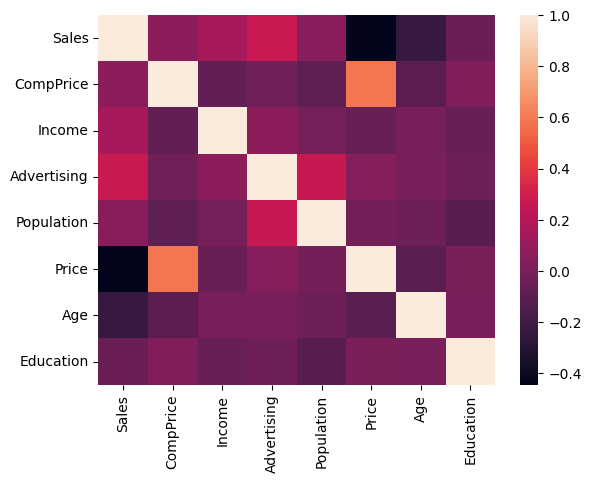

In [39]:
sns.heatmap(carseats1.corr())

The is a strong relationship between Sales and income,population and advertising

🚀 <font color='#d9c4b1'> Exercise: </font> For the categorical variables, check how many observations are in each category. How does carseat sales vary by category?

In [40]:
print(carseats1['ShelveLoc'].value_counts())
print(carseats1['US'].value_counts())
print(carseats1['Urban'].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    258
No     142
Name: US, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64


In [41]:
print(carseats1['ShelveLoc'].unique())
print(carseats1['US'].unique())
print(carseats1['Urban'].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [42]:
print(carseats1['ShelveLoc'].unique())
print(carseats1['US'].unique())
print(carseats1['Urban'].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


In [43]:
print(carseats1['ShelveLoc'].value_counts())
print(carseats1['US'].value_counts())
print(carseats1['Urban'].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    258
No     142
Name: US, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64


To get ready to fit a linear regression model, we must first use one-hot encoding to convert our categorical variables into dummies. Read more about one-hot encoding here! https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

🚀 <font color='#d9c4b1'> Exercise: </font> Use the `pd.get_dummies` function to do this. If you don't know how to use this function, try looking at its help page with `?pd.get_dummies`. Don't forget to choose a reference category and omit this column from the dataset.

In [44]:
one_hot_encoded_carseats1 = pd.get_dummies(carseats1, columns = ['ShelveLoc', 'US','Urban'])
print(one_hot_encoded_carseats1)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveL

In [45]:
X = X[:, 1:]

Great - all the columns are now numerical! We are ready to fit our first linear regression model.

Begin by importing the `LinearRegression` class. Inspect the help to see what parameters can be set when we instantiate an object of this class and what the default arguments are:

In [48]:
print(one_hot_encoded_carseats1)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveL

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_carseats1.iloc[:,:-1], one_hot_encoded_carseats1.Sales, test_size=0.2, random_state=2)

In [52]:
print(X_train)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
205   5.68        113      22            1         317    132   28         12   
354   5.30        133      31            1          80    145   42         18   
3     7.40        117     100            4         466     97   55         14   
264   6.95        128      29            5         324    159   31         15   
194   7.23        112      98           18         481    128   45         11   
..     ...        ...     ...          ...         ...    ...  ...        ...   
299   9.40        135      40           17         497     96   54         17   
22    5.08        128      46            6         497    138   42         13   
72    5.52        115      45            0         432    116   25         15   
15    8.71        149      95            5         400    144   76         18   
168   7.30        129      89            0         425    117   45         10   

     ShelveLoc_Bad  ShelveL

In [54]:
print(X_test)

     Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
94    8.39        115      97            5         134     84   55         11   
32    6.20        107      32           12         236    137   64         10   
225   6.68        107      25            0         412     82   36         14   
157  10.21        121      58            8         249     90   48         13   
356   3.58        142     109            0         111    164   72         12   
..     ...        ...     ...          ...         ...    ...  ...        ...   
188   8.07        116      37            0         426     90   76         15   
223   3.45        110      45            9         276    125   62         14   
65    4.90        122      26            0         197    128   55         13   
262   6.37        120      77           15          86    132   48         18   
186   8.68        120      51            0          93     86   46         17   

     ShelveLoc_Bad  ShelveL

In [53]:
print(y_train)

205    5.68
354    5.30
3      7.40
264    6.95
194    7.23
       ... 
299    9.40
22     5.08
72     5.52
15     8.71
168    7.30
Name: Sales, Length: 320, dtype: float64


In [ ]:
y_train

In [55]:
y_test

94      8.39
32      6.20
225     6.68
157    10.21
356     3.58
       ...  
188     8.07
223     3.45
65      4.90
262     6.37
186     8.68
Name: Sales, Length: 80, dtype: float64

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

Like all supervised learning methods in `sklearn`, the `model` object has a `fit` method for estimating the model parameters (using the training data) and a `predict` method for making predictions on new data (the test data).

🚀 <font color='#d9c4b1'> Exercise: </font> Train a linear model to predict `Sales` using all the other columns in this dataset; that is, estimate the $\beta$ parameters by minimising the RSS loss function on the training data. If you are not sure how to do this, try examining `?model.fit`.

In [57]:
y_pred = regressor.predict(X_test)
y_pred

array([ 8.39000000e+00,  6.20000000e+00,  6.68000000e+00,  1.02100000e+01,
        3.58000000e+00,  1.49000000e+01,  9.01000000e+00,  1.21100000e+01,
        1.19300000e+01,  7.80000000e+00,  1.06600000e+01,  7.70000000e+00,
        4.74000000e+00,  1.09800000e+01,  7.44000000e+00,  5.32000000e+00,
        1.32800000e+01,  5.57000000e+00,  8.97000000e+00,  1.00600000e+01,
        8.75000000e+00,  4.53000000e+00,  2.23000000e+00,  5.94000000e+00,
        9.46000000e+00,  1.00800000e+01,  6.41000000e+00,  9.32000000e+00,
        4.95000000e+00,  4.67000000e+00,  6.85000000e+00,  9.16000000e+00,
        1.01400000e+01,  1.20100000e+01,  1.18500000e+01,  6.43000000e+00,
        7.41000000e+00,  6.92000000e+00,  2.99000000e+00,  1.12700000e+01,
        5.56000000e+00,  5.74000000e+00,  4.11000000e+00,  9.31000000e+00,
        6.53000000e+00,  5.99000000e+00,  8.79000000e+00,  8.14000000e+00,
        1.01000000e+01,  1.04900000e+01,  3.90000000e+00,  1.03100000e+01,
       -4.68468273e-15,  

🚀 <font color='#d9c4b1'> Exercise: </font> Interpret your regression coefficients. Do these correspond to the relationships that you discovered in your exploratory data analysis above?

In [58]:
print(regressor.intercept_)

1.4210854715202004e-14


In [59]:
print(regressor.coef_)

[ 1.00000000e+00  1.28002645e-16  8.55487675e-17  1.04730430e-16
 -1.30228619e-16  6.42285043e-17 -2.64653584e-17 -1.20906704e-16
 -5.28302049e-17 -3.19084221e-16 -7.37416869e-17  5.18185851e-17
 -4.49685002e-17 -7.52163577e-17]


🚀 <font color='#d9c4b1'> Exercise: </font> Plot the actual sales versus the predicted sales. Compute the coefficient of determination ($R^2$). Does this seem like a good model?

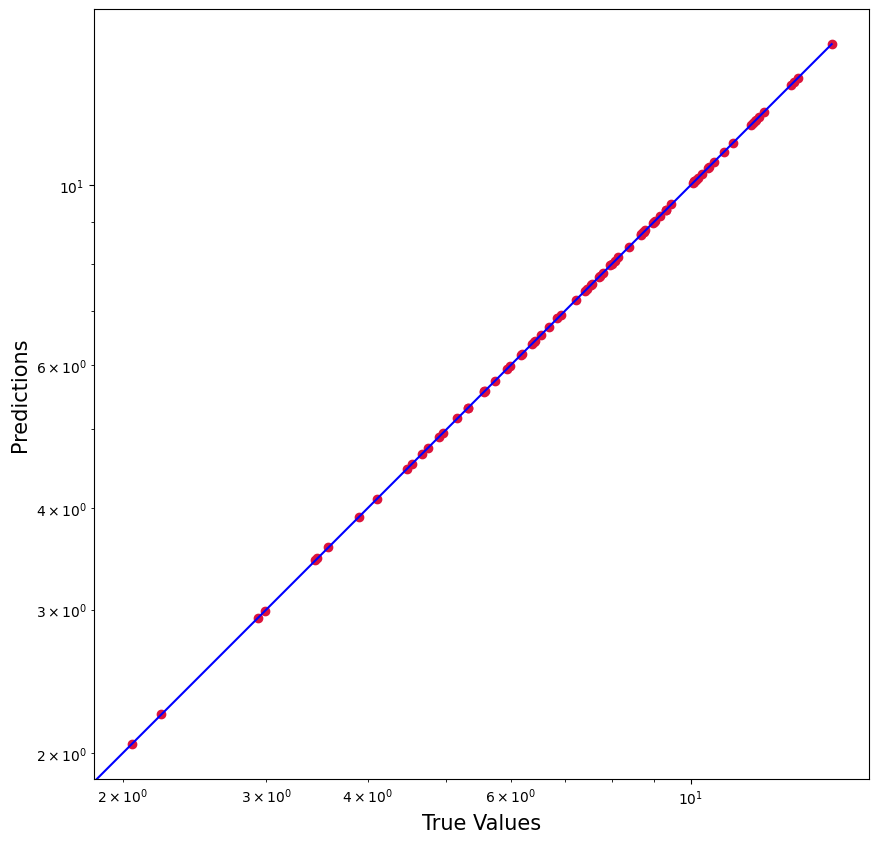

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [35]:
# your code goes here
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

-0.0015686025176266938

In [39]:
mean_squared_error(y_test, y_pred)

19936.05881759457

In [40]:
mean_absolute_error(y_test, y_pred)

120.17209237153057

From our exploratory data analysis, we saw that only price and shelf location seem to be strongly associated with sales. All these other features might be making our model unnecessarily complex and harder to productionize.

🚀 <font color='#d9c4b1'> Exercise: </font> Use cross-validation to determine which model is best: the full model above or a simpler model that only includes price and shelf location as features.

In [ ]:
# your code goes here
from sklearn.metrics import SCORERS
SCORERS.keys()

In [54]:
from sklearn.model_selection import cross_val_score

regressor = LinearRegression()

cv_scores = cross_val_score(estimator=regressor, X=carseats1[['Advertising']], y=carseats1['Sales'], scoring="neg_mean_squared_error", cv=5)
cv_scores

array([-9.30240688, -6.10911134, -7.57224833, -7.0638359 , -7.38666641])

In [55]:
-cv_scores.mean()

7.486853770207219

Let's try and improve on our simple model...

🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you think that the relationship between sales and price is likely to differ depending on the shelf location. Add an interation effect to your simple model and see if it improves on model performance.

In [58]:
# your code goes here
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error"}
cv_info = cross_validate(estimator=regressor, X=carseats1[['Advertising']], y=carseats1['Sales'], scoring=scoring_functions, cv=10, return_train_score=True)
cv_carseats1 = pd.DataFrame(cv_info)
cv_carseats1

,fit_time,score_time,test_negMSE,train_negMSE,test_negMAE,train_negMAE
0,0.159910,0.023985,-9.617066,-7.142745,-2.414583,-2.131617
1,0.021989,0.022985,-9.181840,-7.181219,-2.508130,-2.123075
2,0.024977,0.016994,-5.869632,-7.548639,-2.022663,-2.177245
3,0.028979,0.016987,-6.468686,-7.483667,-2.054173,-2.169502
4,0.010994,0.007994,-8.450597,-7.264575,-2.343307,-2.142659
5,0.012996,0.018993,-6.440586,-7.486512,-2.057183,-2.173915
6,0.013991,0.013993,-6.118420,-7.523133,-1.925351,-2.184942
7,0.017989,0.014992,-7.748240,-7.345416,-2.048022,-2.169543
8,0.016990,0.011993,-7.061483,-7.413571,-2.180696,-2.158047
9,0.012991,0.011990,-7.756561,-7.339710,-2.158070,-2.157755


🚀 <font color='#d9c4b1'> Exercise: </font> Suppose you suspect that there is a quadratic relationship between sales and price. (The exploratory analysis doesn't actually support this, but let's go ahead anyway!) Extend your simple model to include an quadratic term for price and determine if it improves model performance.

In [ ]:
# your code goes here